# 1D Linear Convection

In [129]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [130]:
# Create grid
# Set parameters
nx = 41
L = 2.0
dx = L / (nx - 1)
nt = 25
dt = 0.02
c = 1.0

x = numpy.linspace(0.0, L, num=nx)

In [131]:
# Set initial conditions with 1.0 everywhere (for now).
u0 = numpy.ones(nx)
# Get a list of indices where 0.5 <= x <= 1.0.
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
print(mask)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),)


In [132]:
u0[mask] = 2.0

In [133]:
for i in range(nx):
    print(x[i], u0[i])

0.0 1.0
0.05 1.0
0.1 1.0
0.15000000000000002 1.0
0.2 1.0
0.25 1.0
0.30000000000000004 1.0
0.35000000000000003 1.0
0.4 1.0
0.45 1.0
0.5 2.0
0.55 2.0
0.6000000000000001 2.0
0.65 2.0
0.7000000000000001 2.0
0.75 2.0
0.8 2.0
0.8500000000000001 2.0
0.9 2.0
0.9500000000000001 2.0
1.0 2.0
1.05 1.0
1.1 1.0
1.1500000000000001 1.0
1.2000000000000002 1.0
1.25 1.0
1.3 1.0
1.35 1.0
1.4000000000000001 1.0
1.4500000000000002 1.0
1.5 1.0
1.55 1.0
1.6 1.0
1.6500000000000001 1.0
1.7000000000000002 1.0
1.75 1.0
1.8 1.0
1.85 1.0
1.9000000000000001 1.0
1.9500000000000002 1.0
2.0 1.0


In [134]:
def plot_figure(x, u0, u):
    pyplot.figure(figsize=(4.0,4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('y')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial')
    pyplot.plot(x, u, label='Current')
    pyplot.legend()
    pyplot.xlim(0.0, 2.0)
    pyplot.ylim(0.0, 2.5)
    

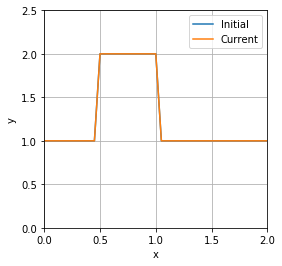

In [135]:
plot_figure(x, u0, u0)

In [136]:
u = u0.copy()
for n in range(nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])

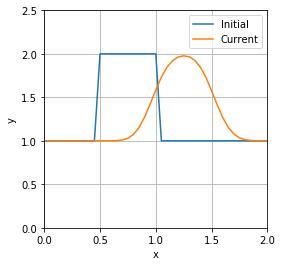

In [137]:
plot_figure(x, u0, u)

# 1D Non-Linear Convection

In [138]:
u = u0.copy()
for n in range(1, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i - 1])

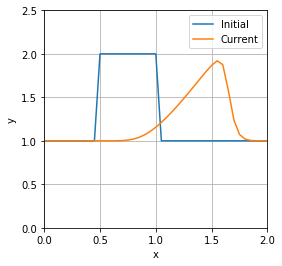

In [139]:
plot_figure(x, u0, u)

In [141]:
a = numpy.linspace(0.0, 1.0, num=6)
a

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [142]:
a[1:-1]

array([0.2, 0.4, 0.6, 0.8])

In [143]:
a[1:]

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [144]:
a[:]

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [146]:
for i in range(1, len(a)):
    a[i] = 1.0
    
a

array([0., 1., 1., 1., 1., 1.])

In [148]:
a[1:] = 1.0
a

array([0., 1., 1., 1., 1., 1.])

In [149]:
a = numpy.linspace(0.0, 1.0, num=6)
b = numpy.linspace(1.0, 2.0, num=6)

a[1:] = b[:-1]

In [152]:
# The two commented lines are equivalent to the last line
u = u0.copy()
for n in range(1, nt):
    un = u.copy()
#    for i in range(1, nx):
#        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i - 1])
    u[1:] = un[1:] - un[1:] * dt / dx * (un[1:] - un[: -1])

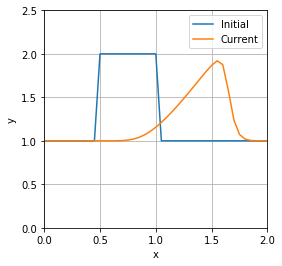

In [153]:
plot_figure(x, u0, u)